In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')
df.head()

C:\Users\pipil\AppData\Local\Temp\ipykernel_31508\1368375737.py:1: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


,Unnamed: 0,MONTH,FinancialYear,ward,ward_n,WARD_5,WARD_6,WARD_7,ward_unique,WARD_0,...,WT_Q58_E,WT_Q59,WT_Q59_B,WT_Q59_E,WT_Q60,WT_Q60_B,WT_Q60_E,WT_Discrete,WT_Discrete_rebased,interview_date
0,1,97 (Apr 2019),15,E05009397 ...,Holland ...,...,...,...,Holland - Kensington and Chelsea ...,...,...,0.597013,NaN,0.597013,0.597013,NaN,0.597013,0.597013,0.597898,0.596407,13773974400
1,2,97 (Apr 2019),15,E05009388 ...,Abingdon ...,...,...,...,Abingdon - Kensington and Chelsea ...,...,...,0.274241,NaN,0.274241,0.274241,NaN,0.274241,0.274241,0.274648,0.273963,13773974400
2,3,97 (Apr 2019),15,E05009397 ...,Holland ...,...,...,...,Holland - Kensington and Chelsea ...,...,...,0.272295,NaN,0.272295,0.272295,NaN,0.272295,0.272295,0.272699,0.272019,13773974400
3,4,97 (Apr 2019),15,E05009388 ...,Abingdon ...,...,...,...,Abingdon - Kensington and Chelsea ...,...,...,0.311370,NaN,0.311370,0.311370,NaN,0.311370,0.311370,0.311832,0.311055,13773974400
4,5,97 (Apr 2019),15,E05009397 ...,Holland ...,...,...,...,Holland - Kensington and Chelsea ...,...,...,0.471946,NaN,0.471946,0.471946,NaN,0.471946,0.471946,0.472646,0.471467,13773974400


In [5]:
columns_to_clean = ['NQ135BB', 'NQ135BC', 'NQ135BL', 'NQ135BM', 'NQ135BN',
                    'SQ80C', 'SQ80D', 'Q9','Q141', 'Q142F', 'NQ143',
                     'Q144','Q145','NQ155r','Q148','WT_Q53', "WT_Q53_E","WT_Q54",
    "WT_Q54_B",  "WT_Q54_E","WT_Q55", "WT_Q55_B",  "WT_Q55_E", "WT_Q56", "WT_Q56_B",
    "WT_Q56_E", "WT_Q57","WT_Q57_B","WT_Q57_E", "WT_Q58", "WT_Q58_B",  "WT_Q58_E", "WT_Q59", 
      "WT_Q59_B","WT_Q59_E", "WT_Q60","WT_Q60_B",   "WT_Q60_E",   "WT_Discrete",
    "WT_Discrete_rebased"]

df.drop(columns=columns_to_clean, inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)


KeyError: "['NQ135BB', 'NQ135BC', 'NQ135BL', 'NQ135BM', 'NQ135BN', 'SQ80C', 'SQ80D', 'Q9', 'Q141', 'Q142F', 'NQ143', 'Q144', 'Q145', 'NQ155r', 'Q148', 'WT_Q53'] not found in axis"

In [6]:
more_to_clean=["WT_Q53_E","WT_Q54",
    "WT_Q54_B",  "WT_Q54_E","WT_Q55", "WT_Q55_B",  "WT_Q55_E", "WT_Q56", "WT_Q56_B",
    "WT_Q56_E", "WT_Q57","WT_Q57_B","WT_Q57_E", "WT_Q58", "WT_Q58_B",  "WT_Q58_E", "WT_Q59", 
      "WT_Q59_B","WT_Q59_E", "WT_Q60","WT_Q60_B",   "WT_Q60_E",   "WT_Discrete",
    "WT_Discrete_rebased"]
df.drop(columns=more_to_clean, inplace=True)
df.to_csv('cleaned_dataset1.csv', index=False)


In [5]:
even_more_to_clean= ["WT_Q53_E","WT_Q54",
    "WT_Q54_B",  "WT_Q54_E","WT_Q55", "WT_Q55_B",  "WT_Q55_E", "WT_Q56", "WT_Q56_B",
    "WT_Q56_E", "WT_Q57","WT_Q57_B","WT_Q57_E", "WT_Q58", "WT_Q58_B",  "WT_Q58_E", "WT_Q59", 
      "WT_Q59_B","WT_Q59_E", "WT_Q60","WT_Q60_B",   "WT_Q60_E",   "WT_Discrete",
    "WT_Discrete_rebased", 'NQ135BB', 'NQ135BC', 'NQ135BL', 'NQ135BM', 'NQ135BN',
                    'SQ80C', 'SQ80D', 'Q9','Q141', 'Q142F', 'NQ143',
                     'Q144','Q145','NQ155r','Q148','WT_Q53', "WT_Q53_E","WT_Q54",
    "WT_Q54_B",  "WT_Q54_E","WT_Q55", "WT_Q55_B",  "WT_Q55_E", "WT_Q56", "WT_Q56_B",
    "WT_Q56_E", "WT_Q57","WT_Q57_B","WT_Q57_E", "WT_Q58", "WT_Q58_B",  "WT_Q58_E", "WT_Q59", 
      "WT_Q59_B","WT_Q59_E", "WT_Q60","WT_Q60_B",   "WT_Q60_E",   "WT_Discrete",
    "WT_Discrete_rebased",'Q3F', 'Q3G', 'Q3K', 'NQ7B', 'XQ9A', 'ZQ10A', 'ZQ10B', 'ZQ10C', 'ZQ10D', 'ZQ10E', 'ZQ10F', 'ZQ10H', 'ZQ10I', 
    'ZQ10J', 'ZNQ10A', 'ZNQ10BA', 'Q54A', 'Q54B', 'Q54C', 'Q54D', 'Q54E', 'NQ57AA', 'NQ57AB', 'NQ57AC', 'NQ57AD', 
    'NQ57AE', 'NQ48A', 'NQ49B', 'NQ49C', 'NQ45A', 'NQ45BA', 'XQ57A', 'XQ57B', 'XQ57C', 'XQ57EA', 'XQ57EB', 'XQ57EC', 
    'XQ57ED', 'XQ57EE', 'XQ57EF', 'Q58', 'Q59', 'NQ62A', 'RQ80E', 'NQ79A', 'NQ79ABA', 'NQ79ABB', 'NQ79ABC', 'NQ79ABD', 
    'NQ79ABE', 'NQ79BB', 'NQ79BC', 'NQ79BD', 'NQ79BI', 'SQ79B', 'SQ79C', 'SQ79DA', 'SQ79DB', 'SQ79DC', 'SQ79DD', 'SQ79DE', 
    'SQ79DF', 'SQ79E', 'SQ79F', 'SQ79EJ', 'SQ79EK', 'SQ79EL', 'SQ79EM', 'SQ79EN', 'SQ79EO', 'Q131', 'Q132B', 'Q132F', 
    'Q132G', 'Q132GG', 'Q132I', 'Q132J', 'Q132K', 'Q132L', 'Q132M', 'Q132N', 'Q132NN', 'Q132O', 'Q132P', 'Q132S', 'Q132V', 
    'Q132W', 'Q132X', 'Q132Y', 'Q132Z', 'Q132AA', 'Q132AB', 'Q132AC', 'Q132AD', 'Q132AE', 'Q132AG', 'Q132AH', 'Q132AI', 
    'Q132AJ', 'Q132AK', 'Q132AL','Q132AM', 'Q132AM', 'SQ132B', 'SQ132F', 'SQ132G', 'SQ132GG', 'SQ132I', 'SQ132J', 
    'SQ132K', 'SQ132L', 'SQ132M', 'SQ132N', 'SQ132NN', 'SQ132O', 'SQ132P', 'SQ132S', 'SQ132V', 'SQ132W', 'SQ132Y', 'SQ132Z',
      'SQ132AB', 'SQ132AC', 'SQ132AD', 'SQ132AE', 'SQ132AG', 'SQ132AH', 'SQ132AI', 'SQ132AJ', 'SQ132AK', 'SQ132AL', 'SQ132AM',
        'SQ132A_2', 'PQ135AA', 'PQ135AB', 'PQ135AC', 'PQ135AD', 'PQ135AE', 'PQ135AF', 'PQ135AG', 'PQ135AH', 'PQ135AI', 'PQ135AJ', 
        'PQ135AL', 'PQ135AM', 'PQ135AN', 'PQ135AO', 'PQ135AP', 'PQ135AQ', 'PQ135AR', 'PQ135AS', 'PQ135AT', 'PQ135AU', 'PQ135AV', 
        'PQ135AW', 'PQ135AX', 'PQ135AY', 'PQ135AZ', 'PQ135AAA', 'PQ135AAB', 'PQ135AAC', 'PQ135AAD', 'PQ135AAE', 'PQ135AAF', 
        'PQ135AAG', 'PQ135AAH', 'PQ135AAI', 'PQ135AAU', 'PQ135AAW', 
        'Q3L', 'XQ9B', 'Q37', 'Q38A', 'Q38B', 'Q38C', 'Q38D', 'Q38E', 'Q39A_2', 'Q39BA', 'Q39BB', 'Q39BC', 'Q39BD', 'Q39BE', 
        'NQ43', 'NQ43AA', 'NQ43AB', 'NQ43AC', 'NQ43AD', 'NQ43AE', 'NQ44A', 'NQ44BA', 'NQ44BB', 'NQ44BC', 'NQ44BD', 'NQ44BE', 
        'NQ46A', 'NQ46BA', 'NQ46BB', 'NQ46BC', 'NQ46BD', 'NQ46BE', 'NQ47A', 'NQ47BA', 'NQ47BB', 'NQ47BC', 'NQ47BD', 'NQ47BE',
          'XQ59A', 'XQ59B', 'XQ59C', 'XQ59D', 'XQ122A', 'A120', 'A121', 'XQ128A', 'XQ128B', 'XQ128C', 'XQ128D', 'Unnamed: 0',
            'MONTH', 'ward', 'ward_n', 'WARD_5', 'WARD_6', 'WARD_7', 'ward_unique', 'WARD_0', 'WARD_1',
    'WARD_2', 'WARD_3', 'WARD_4', 'SOA1', 'SOA2', 'BOROUGHNEIGHBOURHOOD', 'BOROU0', 'BOROU1', 'BOROU2', 'BOROU3',
    'BOROU4', 'BOROU5', 'BOROU6', 'BOROU7', 'BOROUGHNEIGHBOURHOODCODED', 'BQ90B', 'BQ90C', 'BQ90EA', 'BQ90EB',
    'BQ90EC', 'BQ90ED', 'BQ90EE', 'BQ90EF', 'BQ90EG', 'BQ90EH', 'SQ109CAA', 'SQ109CAB', 'SQ109CAC', 'SQ109CAD',
    'SQ109CAE', 'SQ109CAF', 'NQ135BK', 'interview_date']

df.drop(columns=even_more_to_clean, inplace=True)
df.to_csv('final_cleaned_dataset.csv', index=False)

In [13]:
df = pd.read_csv('final_cleaned_dataset.csv')

#Now we aggregate the education levels to be the same where they are equivalent.
df.NQ146.unique()
replacement_dict = {'BTEC Level 1': 'O-levels/CSE/GCSEs','BTEC level 2':'O-levels/CSE/GCSEs','BTEC level 3':'A-levels',
                    'NVQ/GNVQ':'apprenticeship', 'Trade apprenticeship':'apprenticeship', 'ONC, OND or City and Guilds':'A-levels'
                    }
df = df.replace({'NQ146':replacement_dict})
df.to_csv('final_cleaned_dataset1.csv', index=False)

C:\Users\pipil\AppData\Local\Temp\ipykernel_13564\2480955142.py:1: DtypeWarning: Columns (11,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_cleaned_dataset.csv')


C:\Users\pipil\AppData\Local\Temp\ipykernel_17880\2536555520.py:7: DtypeWarning: Columns (11,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_cleaned_dataset1.csv')


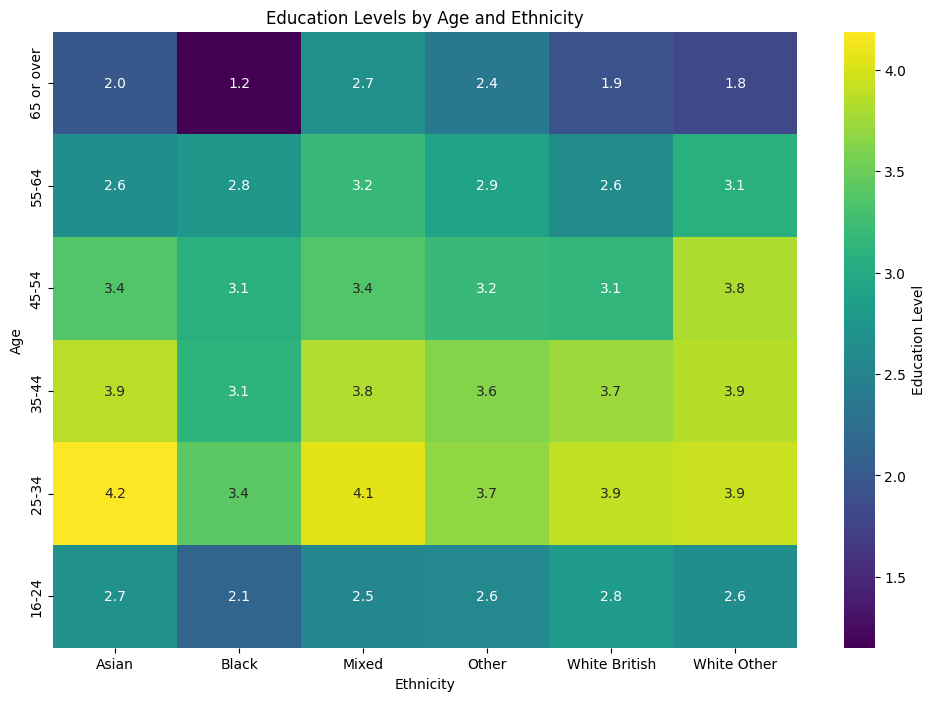

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_cleaned_dataset1.csv')

# Replace and aggregate education levels as needed
replacement_dict = {
    'BTEC Level 1': 'O-levels/CSE/GCSEs',
    'BTEC level 2': 'O-levels/CSE/GCSEs',
    'BTEC level 3': 'A-levels',
    'NVQ/GNVQ': 'apprenticeship',
    'Trade apprenticeship': 'apprenticeship',
    'ONC, OND or City and Guilds': 'A-levels'
}
df = df.replace({'NQ146': replacement_dict})

# Map education levels to numeric values for easier plotting
education_map = {
    'No qualifications': 0,
    'O-levels/CSE/GCSEs': 1,
    'A-levels': 2,
    'apprenticeship': 3,
    'HNC or HND/BTEC level 4': 4,
    'University Degree (Bachelor degree)': 5,
    'Post-graduate degree or qualification': 6
}
df['education_numeric'] = df['NQ146'].map(education_map)

# Define a custom order for the age categories
age_order = ["16-24", "25-34", "35-44", "45-54", "55-64", "65 or over"]
df['Q136r'] = pd.Categorical(df['Q136r'], categories=age_order, ordered=True)

# Pivot the data
pivot_table = df.pivot_table(
    index='Q136r', 
    columns='NQ147r', 
    values='education_numeric', 
    aggfunc=np.mean
)

pivot_table = pivot_table.sort_index(ascending=False)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis', cbar_kws={'label': 'Education Level'})

# Add labels and title
plt.title('Education Levels by Age and Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Age')

# Display the plot
plt.show()

C:\Users\pipil\AppData\Local\Temp\ipykernel_16040\1928780970.py:6: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


['Post-graduate degree or qualification' 'No qualifications'
 'University Degree (Bachelor degree)' 'A-levels' 'O-levels/CSE/GCSEs' nan
 'apprenticeship' 'HNC or HND/BTEC level 4']


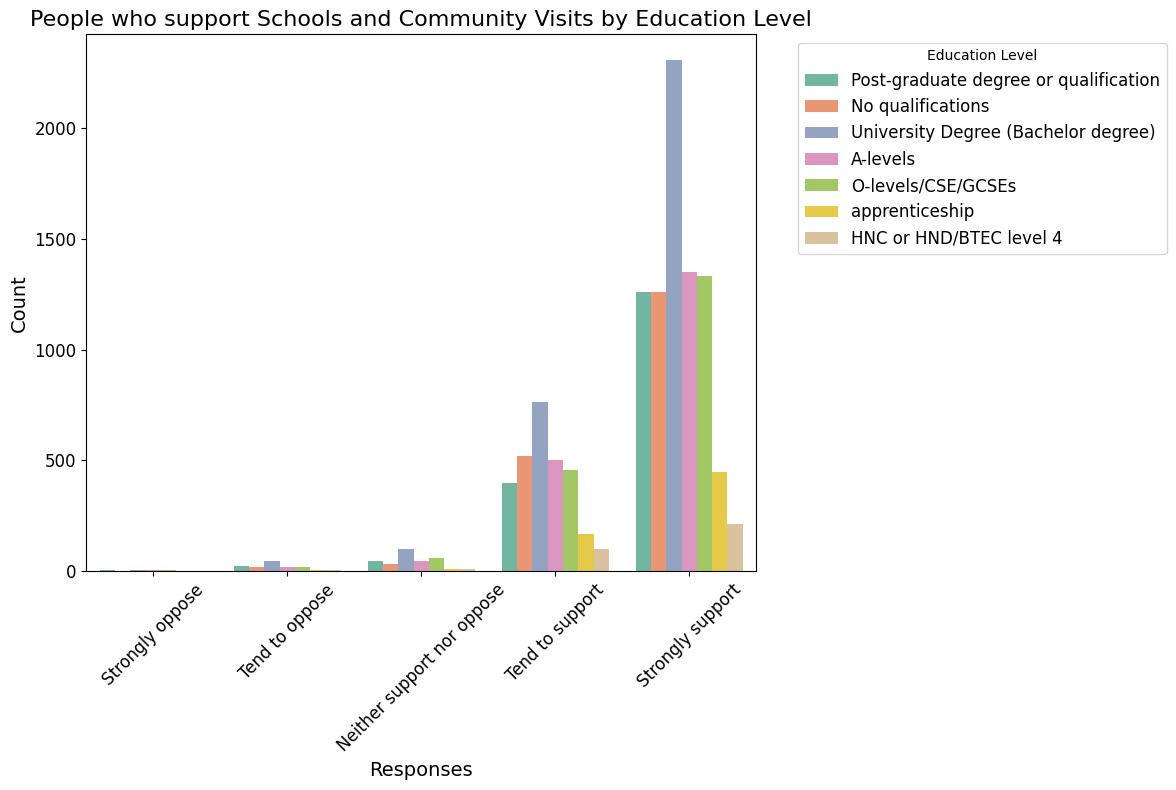

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

# Replace the education levels using the provided replacement_dict
replacement_dict = {
    'BTEC Level 1': 'O-levels/CSE/GCSEs',
    'BTEC level 2': 'O-levels/CSE/GCSEs',
    'BTEC level 3': 'A-levels',
    'NVQ/GNVQ': 'apprenticeship',
    'Trade apprenticeship': 'apprenticeship',
    'ONC, OND or City and Guilds': 'A-levels'
}
df = df.replace({'NQ146': replacement_dict})

df = df[df['NQ146'] != 'Other - please specify'] 

# Check the replacements
print(df['NQ146'].unique())

# Drop rows where either SQ79EB or NQ146 is NaN
df = df.dropna(subset=['SQ79EB', 'NQ146'])

# Set the order of the categories on the x-axis
order = ['Strongly oppose', 'Tend to oppose', 'Neither support nor oppose', 'Tend to support', 'Strongly support']
df['SQ79EB'] = pd.Categorical(df['SQ79EB'], categories=order, ordered=True)

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='SQ79EB', hue='NQ146', palette='Set2', order=order)
plt.title('People who support Schools and Community Visits by Education Level', fontsize=16)
plt.xlabel('Responses', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\pipil\AppData\Local\Temp\ipykernel_16040\2139812837.py:5: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


Q132AM (None of these): 6933
Q132P (Leaflets/newsletters from the police): 2590
Q132NN (Social Media): 1286
Q132K (Local newspapers): 1147
Q132M (Television): 715
Q132G (Contact with local police officers): 475
Q132N (Websites): 463
Q132O (E-mail/texts from the police): 441
Q132I (Advertising campaigns): 438
Q132GG (Neighbourhood Board): 411
Q132S (Other): 313
Q132L (Radio): 272
Q132J (National newspapers): 202
Q132B (In person visiting local police station): 182
Q132F (Contact with local councillors): 175
Q132V (Magazine/book): 0
Q132W (Word of mouth): 0
Q132X (College/university): 0
Q132Y (Neighbourhood watch): 0
Q132Z (At work): 0
Q132AA (Schools/youth clubs): 0
Q132AB (Resident Newsletter/Citizen Mag): 0
Q132AC (Survey): 0
Q132AD (Church group): 0
Q132AE (Library): 0
Q132AG (Incident boards/notices): 0
Q132AH (Local meeting): 0
Q132AI (Via the Council): 0
Q132AJ (Police surgeries/open days/police events): 0
Q132AK (Ringmaster messaging scheme): 0
Q132AL (Other leaflets): 0
Q132AL (

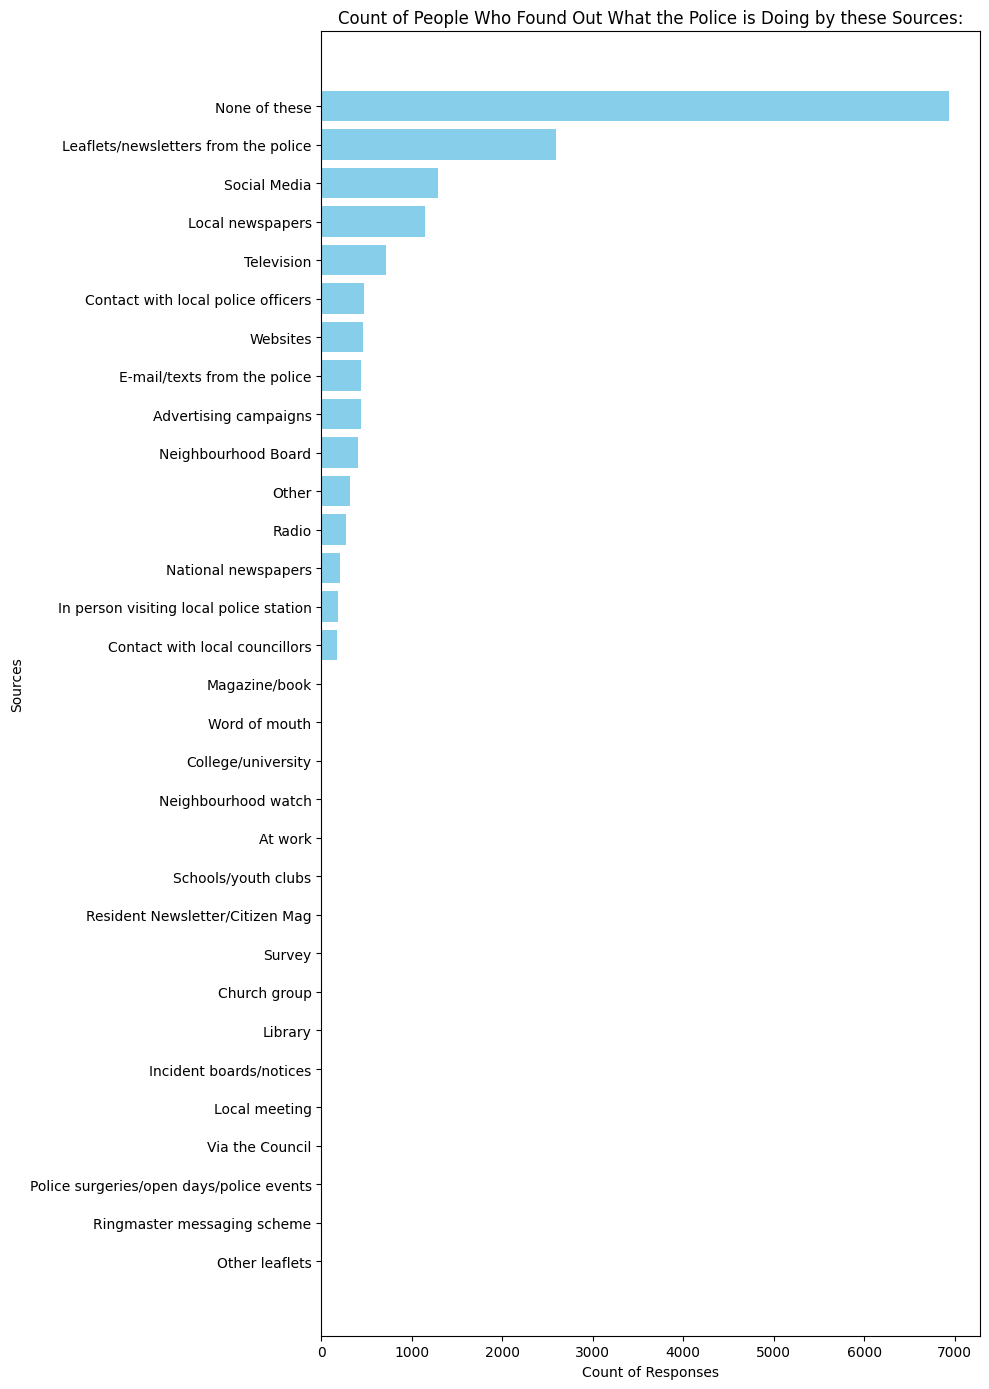

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

# List of column names
columns_of_interest = [
    'Q132B', 'Q132F', 'Q132G', 'Q132GG', 'Q132I', 'Q132J', 'Q132K', 'Q132L', 'Q132M', 'Q132N', 'Q132NN',
    'Q132O', 'Q132P', 'Q132S', 'Q132V', 'Q132W', 'Q132X', 'Q132Y', 'Q132Z', 'Q132AA', 'Q132AB', 'Q132AC',
    'Q132AD', 'Q132AE', 'Q132AG', 'Q132AH', 'Q132AI', 'Q132AJ', 'Q132AK', 'Q132AL', 'Q132AM'
]

# Dictionary to map column codes to their explanations
explanations = {
    'Q132B': 'In person visiting local police station',
    'Q132F': 'Contact with local councillors',
    'Q132G': 'Contact with local police officers',
    'Q132GG': 'Neighbourhood Board',
    'Q132I': 'Advertising campaigns',
    'Q132J': 'National newspapers',
    'Q132K': 'Local newspapers',
    'Q132L': 'Radio',
    'Q132M': 'Television',
    'Q132N': 'Websites',
    'Q132NN': 'Social Media',
    'Q132O': 'E-mail/texts from the police',
    'Q132P': 'Leaflets/newsletters from the police',
    'Q132S': 'Other',
    'Q132V': 'Magazine/book',
    'Q132W': 'Word of mouth',
    'Q132X': 'College/university',
    'Q132Y': 'Neighbourhood watch',
    'Q132Z': 'At work',
    'Q132AA': 'Schools/youth clubs',
    'Q132AB': 'Resident Newsletter/Citizen Mag',
    'Q132AC': 'Survey',
    'Q132AD': 'Church group',
    'Q132AE': 'Library',
    'Q132AG': 'Incident boards/notices',
    'Q132AH': 'Local meeting',
    'Q132AI': 'Via the Council',
    'Q132AJ': 'Police surgeries/open days/police events',
    'Q132AK': 'Ringmaster messaging scheme',
    'Q132AL': 'Other leaflets',
    'Q132AM': 'None of these'
}

# Count non-missing and non-dash entries for each column
counts = {}
for col in columns_of_interest:
    counts[col] = df[col].notna().sum() - (df[col] == '-').sum()

# Sort the columns by the count
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Print the sorted column names with their corresponding counts
for col, count in sorted_counts.items():
    print(f"{col} ({explanations[col]}): {count}")

# Create labels for the x-axis using the explanations
sorted_labels = [explanations[col] for col in sorted_counts.keys()]

# Reverse the sorted counts and labels for highest at the top
sorted_counts_reversed = dict(reversed(list(sorted_counts.items())))
sorted_labels_reversed = [explanations[col] for col in sorted_counts_reversed.keys()]

# Print the sorted column names with their corresponding counts
for col, count in sorted_counts_reversed.items():
    print(f"{col} ({explanations[col]}): {count}")

# Plot the counts
plt.figure(figsize=(10, 14))
plt.barh(sorted_labels_reversed, sorted_counts_reversed.values(), color='skyblue')
plt.xlabel('Count of Responses')
plt.ylabel('Sources')
plt.title('Count of People Who Found Out What the Police is Doing by these Sources:')
plt.tight_layout()
plt.show()

C:\Users\pipil\AppData\Local\Temp\ipykernel_16040\3134593249.py:5: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


Q132B (In person visiting local police station): 80
Q132F (Contact with local councillors): 109
Q132L (Radio): 116
Q132J (National newspapers): 116
Q132S (Other): 156
Q132I (Advertising campaigns): 173
Q132GG (Neighbourhood Board): 230
Q132G (Contact with local police officers): 242
Q132O (E-mail/texts from the police): 249
Q132N (Websites): 277
Q132M (Television): 317
Q132K (Local newspapers): 569
Q132NN (Social Media): 708
Q132P (Leaflets/newsletters from the police): 1078
Q132AM (None of these): 2847


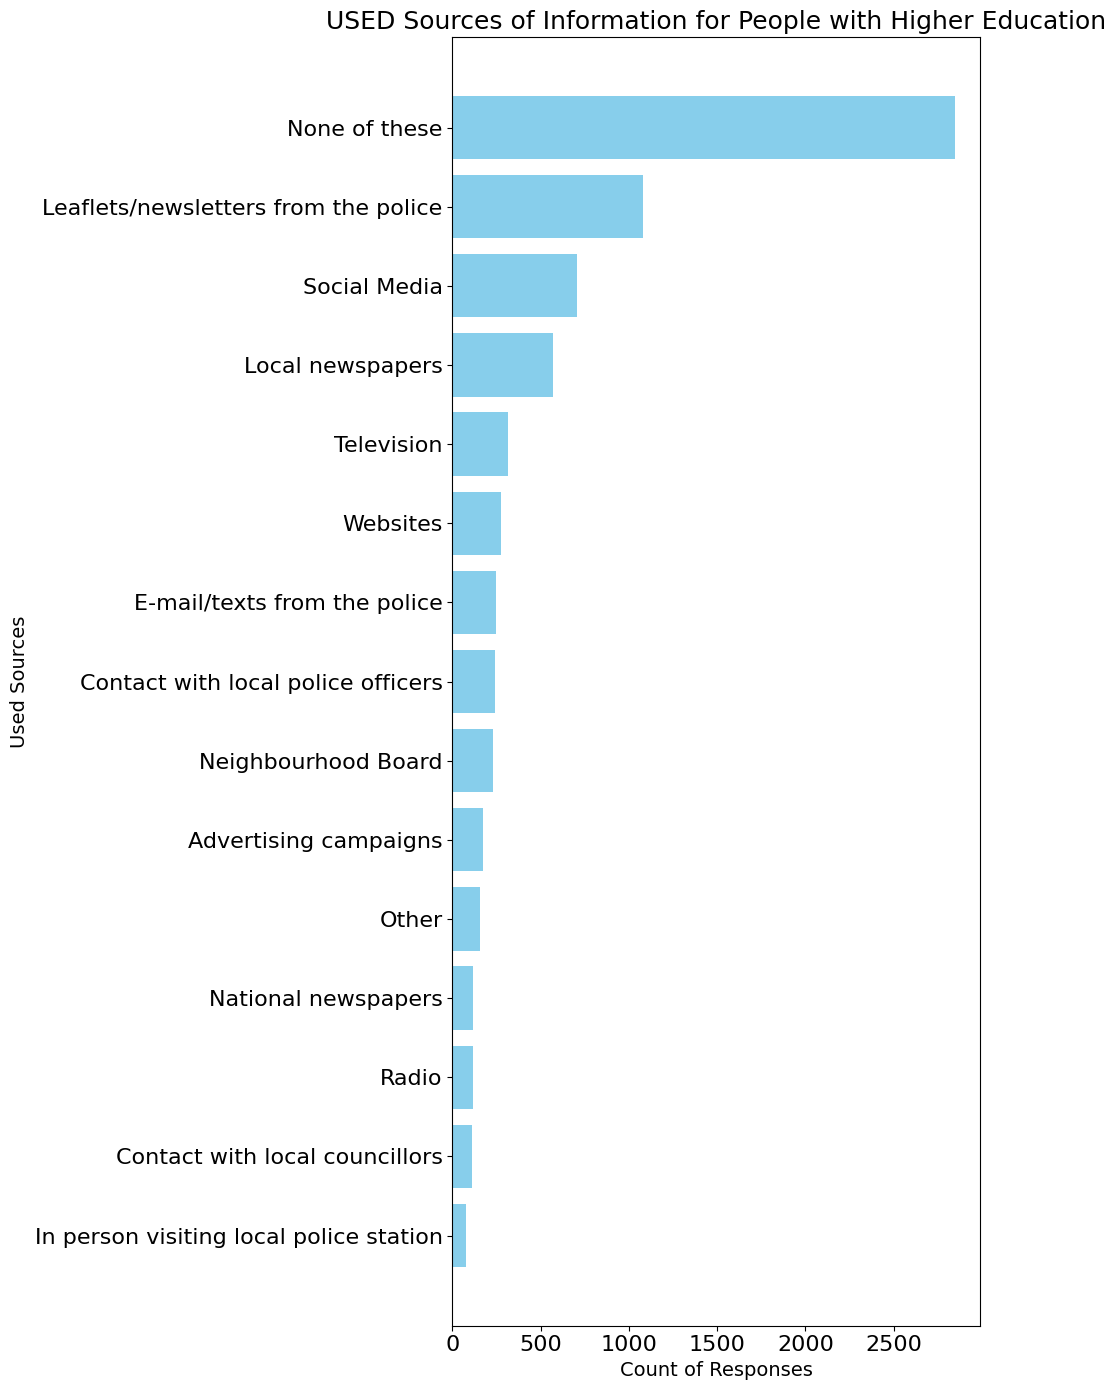

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

# Column with education levels
education_column = 'NQ146'

# Values for higher education
higher_education_values = [
    'Post-graduate degree or qualification',
    'University Degree (Bachelor degree)',
    'Apprenticeship',
    'HNC or HND/BTEC level 4'
]

# Filter the dataset for higher education
higher_education_df = df[df[education_column].isin(higher_education_values)]

# List of column names
columns_of_interest = [
    'Q132B', 'Q132F', 'Q132G', 'Q132GG', 'Q132I', 'Q132J', 'Q132K', 'Q132L', 'Q132M', 'Q132N', 'Q132NN',
    'Q132O', 'Q132P', 'Q132S', 'Q132V', 'Q132W', 'Q132X', 'Q132Y', 'Q132Z', 'Q132AA', 'Q132AB', 'Q132AC',
    'Q132AD', 'Q132AE', 'Q132AG', 'Q132AH', 'Q132AI', 'Q132AJ', 'Q132AK', 'Q132AL', 'Q132AM'
]

# Dictionary to map column codes to their explanations
explanations = {
    'Q132B': 'In person visiting local police station',
    'Q132F': 'Contact with local councillors',
    'Q132G': 'Contact with local police officers',
    'Q132GG': 'Neighbourhood Board',
    'Q132I': 'Advertising campaigns',
    'Q132J': 'National newspapers',
    'Q132K': 'Local newspapers',
    'Q132L': 'Radio',
    'Q132M': 'Television',
    'Q132N': 'Websites',
    'Q132NN': 'Social Media',
    'Q132O': 'E-mail/texts from the police',
    'Q132P': 'Leaflets/newsletters from the police',
    'Q132S': 'Other',
    'Q132V': 'Magazine/book',
    'Q132W': 'Word of mouth',
    'Q132X': 'College/university',
    'Q132Y': 'Neighbourhood watch',
    'Q132Z': 'At work',
    'Q132AA': 'Schools/youth clubs',
    'Q132AB': 'Resident Newsletter/Citizen Mag',
    'Q132AC': 'Survey',
    'Q132AD': 'Church group',
    'Q132AE': 'Library',
    'Q132AG': 'Incident boards/notices',
    'Q132AH': 'Local meeting',
    'Q132AI': 'Via the Council',
    'Q132AJ': 'Police surgeries/open days/police events',
    'Q132AK': 'Ringmaster messaging scheme',
    'Q132AL': 'Other leaflets',
    'Q132AM': 'None of these'
}

# Count non-missing and non-dash entries for each column in the filtered dataset
counts = {}
for col in columns_of_interest:
    counts[col] = higher_education_df[col].notna().sum() - (higher_education_df[col] == '-').sum()

# Remove columns with zero counts
counts = {col: count for col, count in counts.items() if count > 0}

# Sort the columns by the count
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Create labels for the x-axis using the explanations
sorted_labels = [explanations[col] for col in sorted_counts.keys()]

# Reverse the sorted counts and labels for highest at the top
sorted_counts_reversed = dict(reversed(list(sorted_counts.items())))
sorted_labels_reversed = [explanations[col] for col in sorted_counts_reversed.keys()]

# Print the sorted column names with their corresponding counts
for col, count in sorted_counts_reversed.items():
    print(f"{col} ({explanations[col]}): {count}")

# Plot the counts
plt.figure(figsize=(10, 14))
plt.barh(sorted_labels_reversed, sorted_counts_reversed.values(), color='skyblue')
plt.xlabel('Count of Responses', fontsize=14)
plt.ylabel('Used Sources', fontsize=14)
plt.title('USED Sources of Information for People with Higher Education', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\pipil\AppData\Local\Temp\ipykernel_16040\507891754.py:5: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


SQ132AL (Other leaflets): 0
SQ132AK (Ringmaster messaging scheme): 0
SQ132AJ (Police surgeries/open days/police events): 0
SQ132AI (Via the Council): 0
SQ132AH (Local meeting): 0
SQ132AG (Incident boards/notices): 0
SQ132AE (Library): 0
SQ132AD (Church group/temple): 0
SQ132AC (Survey): 0
SQ132AB (Association newsletter/citizen mag): 0
SQ132AA (Schools/youth clubs): 0
SQ132Z (At work): 0
SQ132Y (Neighbourhood watch): 0
SQ132X (College/university): 0
SQ132W (Word of mouth): 0
SQ132V (Magazine/book): 0
SQ132S (Other): 144
SQ132F (Contact with local councillors): 494
SQ132J (National newspapers): 543
SQ132B (In person visiting local police station): 581
SQ132L (Radio): 831
SQ132AM (None of these): 834
SQ132GG (Safer Neighbourhood Board): 1256
SQ132I (Advertising campaigns): 1323
SQ132N (Websites): 1716
SQ132M (Television): 1749
SQ132G (Contact with local police officers): 1952
SQ132K (Local newspapers): 2603
SQ132O (E-mail/texts from the police): 2743
SQ132NN (Social Media): 3621
SQ132P (

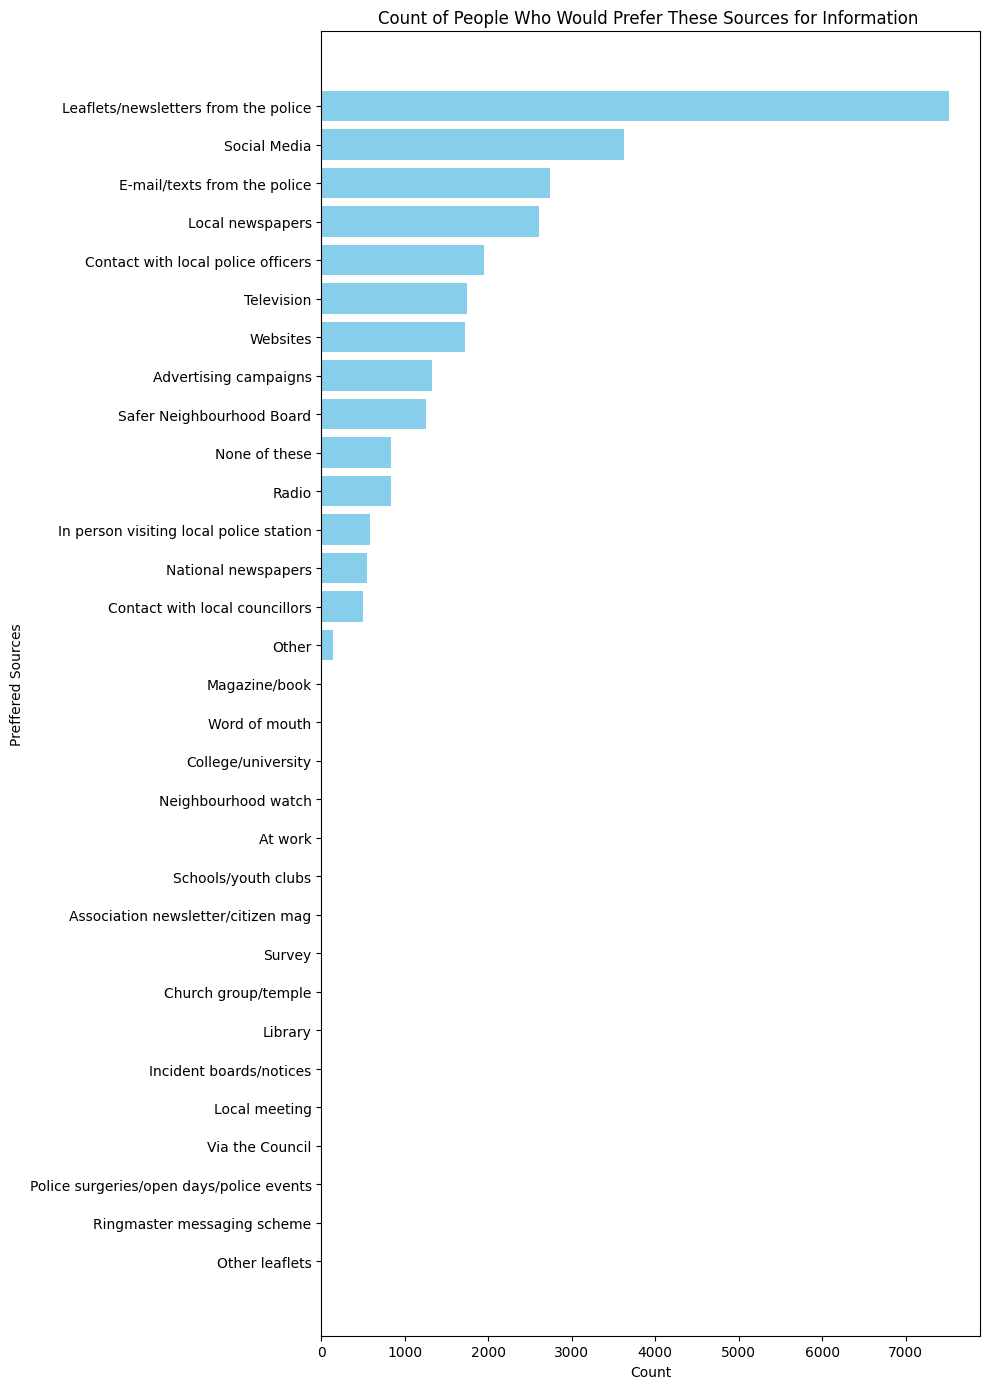

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

# List of column names
columns_of_interest = [
    'SQ132B', 'SQ132F', 'SQ132G', 'SQ132GG', 'SQ132I', 'SQ132J', 'SQ132K', 'SQ132L', 'SQ132M', 'SQ132N', 'SQ132NN',
    'SQ132O', 'SQ132P', 'SQ132S', 'SQ132V', 'SQ132W', 'SQ132X', 'SQ132Y', 'SQ132Z', 'SQ132AA', 'SQ132AB', 'SQ132AC',
    'SQ132AD', 'SQ132AE', 'SQ132AG', 'SQ132AH', 'SQ132AI', 'SQ132AJ', 'SQ132AK', 'SQ132AL', 'SQ132AM'
]

# Dictionary to map column codes to their explanations
explanations = {
    'SQ132B': 'In person visiting local police station',
    'SQ132F': 'Contact with local councillors',
    'SQ132G': 'Contact with local police officers',
    'SQ132GG': 'Safer Neighbourhood Board',
    'SQ132I': 'Advertising campaigns',
    'SQ132J': 'National newspapers',
    'SQ132K': 'Local newspapers',
    'SQ132L': 'Radio',
    'SQ132M': 'Television',
    'SQ132N': 'Websites',
    'SQ132NN': 'Social Media',
    'SQ132O': 'E-mail/texts from the police',
    'SQ132P': 'Leaflets/newsletters from the police',
    'SQ132S': 'Other',
    'SQ132V': 'Magazine/book',
    'SQ132W': 'Word of mouth',
    'SQ132X': 'College/university',
    'SQ132Y': 'Neighbourhood watch',
    'SQ132Z': 'At work',
    'SQ132AA': 'Schools/youth clubs',
    'SQ132AB': 'Association newsletter/citizen mag',
    'SQ132AC': 'Survey',
    'SQ132AD': 'Church group/temple',
    'SQ132AE': 'Library',
    'SQ132AG': 'Incident boards/notices',
    'SQ132AH': 'Local meeting',
    'SQ132AI': 'Via the Council',
    'SQ132AJ': 'Police surgeries/open days/police events',
    'SQ132AK': 'Ringmaster messaging scheme',
    'SQ132AL': 'Other leaflets',
    'SQ132AM': 'None of these'
}

# Count non-missing and non-dash entries for each column
counts = {}
for col in columns_of_interest:
    counts[col] = df[col].notna().sum() - (df[col] == '-').sum()

# Sort the columns by the count
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Reverse the sorted counts and labels for highest at the top
sorted_counts_reversed = dict(reversed(list(sorted_counts.items())))
sorted_labels_reversed = [explanations[col] for col in sorted_counts_reversed.keys()]

# Print the sorted column names with their corresponding counts
for col, count in sorted_counts_reversed.items():
    print(f"{col} ({explanations[col]}): {count}")

# Plot the counts
plt.figure(figsize=(10, 14))
plt.barh(sorted_labels_reversed, sorted_counts_reversed.values(), color='skyblue')
plt.xlabel('Count')
plt.ylabel('Preffered Sources')
plt.title('Count of People Who Would Prefer These Sources for Information ')
plt.tight_layout()
plt.show()

C:\Users\pipil\AppData\Local\Temp\ipykernel_16040\3668828389.py:5: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


SQ132S (Other): 59
SQ132B (In person visiting local police station): 226
SQ132F (Contact with local councillors): 252
SQ132J (National newspapers): 267
SQ132AM (None of these): 281
SQ132L (Radio): 333
SQ132I (Advertising campaigns): 591
SQ132M (Television): 594
SQ132GG (Safer Neighbourhood Board): 653
SQ132G (Contact with local police officers): 874
SQ132N (Websites): 942
SQ132K (Local newspapers): 1171
SQ132O (E-mail/texts from the police): 1573
SQ132NN (Social Media): 1934
SQ132P (Leaflets/newsletters from the police): 3114


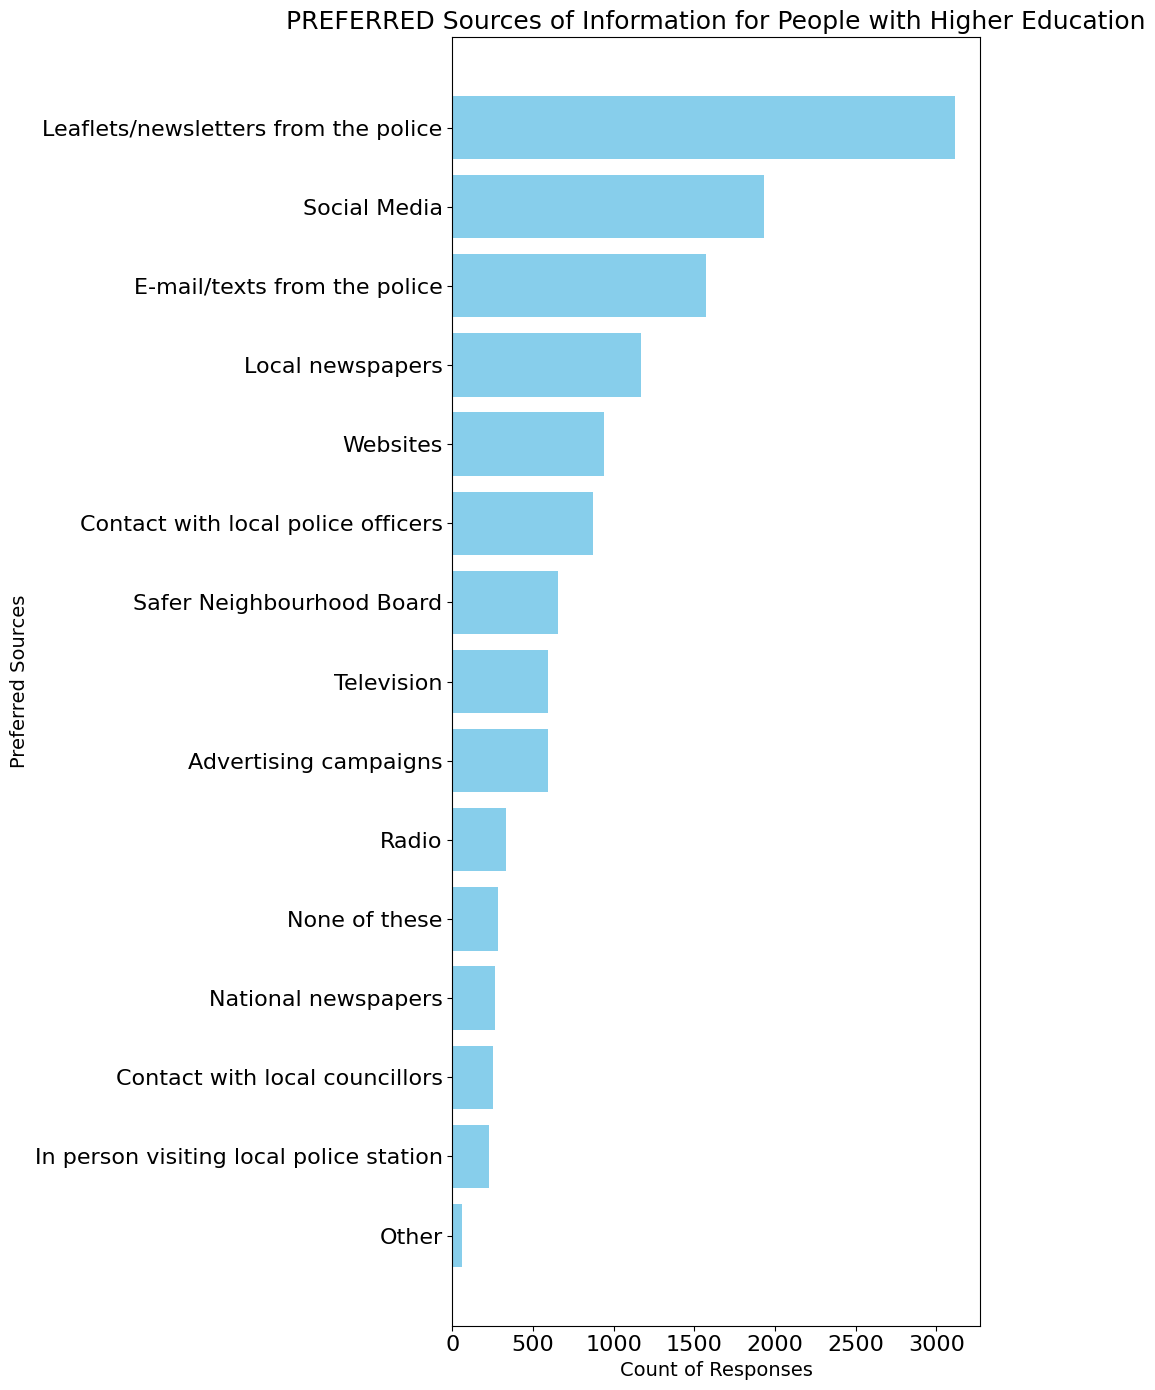

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

# Column with education levels
education_column = 'NQ146'

# Values for higher education
higher_education_values = [
    'Post-graduate degree or qualification',
    'University Degree (Bachelor degree)',
    'Apprenticeship',
    'HNC or HND/BTEC level 4'
]

# Filter the dataset for higher education
higher_education_df = df[df[education_column].isin(higher_education_values)]

# List of column names
columns_of_interest = [
    'SQ132B', 'SQ132F', 'SQ132G', 'SQ132GG', 'SQ132I', 'SQ132J', 'SQ132K', 'SQ132L', 'SQ132M', 'SQ132N', 'SQ132NN',
    'SQ132O', 'SQ132P', 'SQ132S', 'SQ132V', 'SQ132W', 'SQ132X', 'SQ132Y', 'SQ132Z', 'SQ132AA', 'SQ132AB', 'SQ132AC',
    'SQ132AD', 'SQ132AE', 'SQ132AG', 'SQ132AH', 'SQ132AI', 'SQ132AJ', 'SQ132AK', 'SQ132AL', 'SQ132AM'
]

# Dictionary to map column codes to their explanations
explanations = {
    'SQ132B': 'In person visiting local police station',
    'SQ132F': 'Contact with local councillors',
    'SQ132G': 'Contact with local police officers',
    'SQ132GG': 'Safer Neighbourhood Board',
    'SQ132I': 'Advertising campaigns',
    'SQ132J': 'National newspapers',
    'SQ132K': 'Local newspapers',
    'SQ132L': 'Radio',
    'SQ132M': 'Television',
    'SQ132N': 'Websites',
    'SQ132NN': 'Social Media',
    'SQ132O': 'E-mail/texts from the police',
    'SQ132P': 'Leaflets/newsletters from the police',
    'SQ132S': 'Other',
    'SQ132V': 'Magazine/book',
    'SQ132W': 'Word of mouth',
    'SQ132X': 'College/university',
    'SQ132Y': 'Neighbourhood watch',
    'SQ132Z': 'At work',
    'SQ132AA': 'Schools/youth clubs',
    'SQ132AB': 'Association newsletter/citizen mag',
    'SQ132AC': 'Survey',
    'SQ132AD': 'Church group/temple',
    'SQ132AE': 'Library',
    'SQ132AG': 'Incident boards/notices',
    'SQ132AH': 'Local meeting',
    'SQ132AI': 'Via the Council',
    'SQ132AJ': 'Police surgeries/open days/police events',
    'SQ132AK': 'Ringmaster messaging scheme',
    'SQ132AL': 'Other leaflets',
    'SQ132AM': 'None of these'
}

# Count non-missing and non-dash entries for each column in the filtered dataset
counts = {}
for col in columns_of_interest:
    counts[col] = higher_education_df[col].notna().sum() - (higher_education_df[col] == '-').sum()

# Remove columns with zero counts
counts = {col: count for col, count in counts.items() if count > 0}

# Sort the columns by the count
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Reverse the sorted counts and labels for highest at the top
sorted_counts_reversed = dict(reversed(list(sorted_counts.items())))
sorted_labels_reversed = [explanations[col] for col in sorted_counts_reversed.keys()]

# Print the sorted column names with their corresponding counts
for col, count in sorted_counts_reversed.items():
    print(f"{col} ({explanations[col]}): {count}")

# Plot the counts
plt.figure(figsize=(10, 14))
plt.barh(sorted_labels_reversed, sorted_counts_reversed.values(), color='skyblue')
plt.xlabel('Count of Responses', fontsize=14)
plt.ylabel('Preferred Sources' , fontsize=14)
plt.title('PREFERRED Sources of Information for People with Higher Education', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


In [53]:
df['NQ146'] = df['NQ146'].replace(replacement_dict)
df['NQ146'].unique()

0        Post-graduate degree or qualification
1        Post-graduate degree or qualification
2                            No qualifications
3          University Degree (Bachelor degree)
4                                     A-levels
                         ...                  
12362    Post-graduate degree or qualification
12363                       O-levels/CSE/GCSEs
12364    Post-graduate degree or qualification
12365    Post-graduate degree or qualification
12366                       O-levels/CSE/GCSEs
Name: NQ146, Length: 12367, dtype: object

C:\Users\pipil\AppData\Local\Temp\ipykernel_16040\2791763182.py:34: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')



Education Level: Post-graduate degree or qualification
Other: 24
Contact with local councillors: 101
National newspapers: 89
In person visiting local police station: 65
Radio: 92
None of these: 67
Safer Neighbourhood Board: 230
Advertising campaigns: 227
Websites: 334
Television: 180
Contact with local police officers: 292
Local newspapers: 397
E-mail/texts from the police: 569
Social Media: 610
Leaflets/newsletters from the police: 1014

Education Level: No qualifications
Other: 23
Contact with local councillors: 34
National newspapers: 40
In person visiting local police station: 112
Radio: 93
None of these: 238
Safer Neighbourhood Board: 81
Advertising campaigns: 165
Websites: 68
Television: 298
Contact with local police officers: 296
Local newspapers: 303
E-mail/texts from the police: 168
Social Media: 216
Leaflets/newsletters from the police: 1216

Education Level: University Degree (Bachelor degree)
Other: 30
Contact with local councillors: 138
National newspapers: 159
In person 

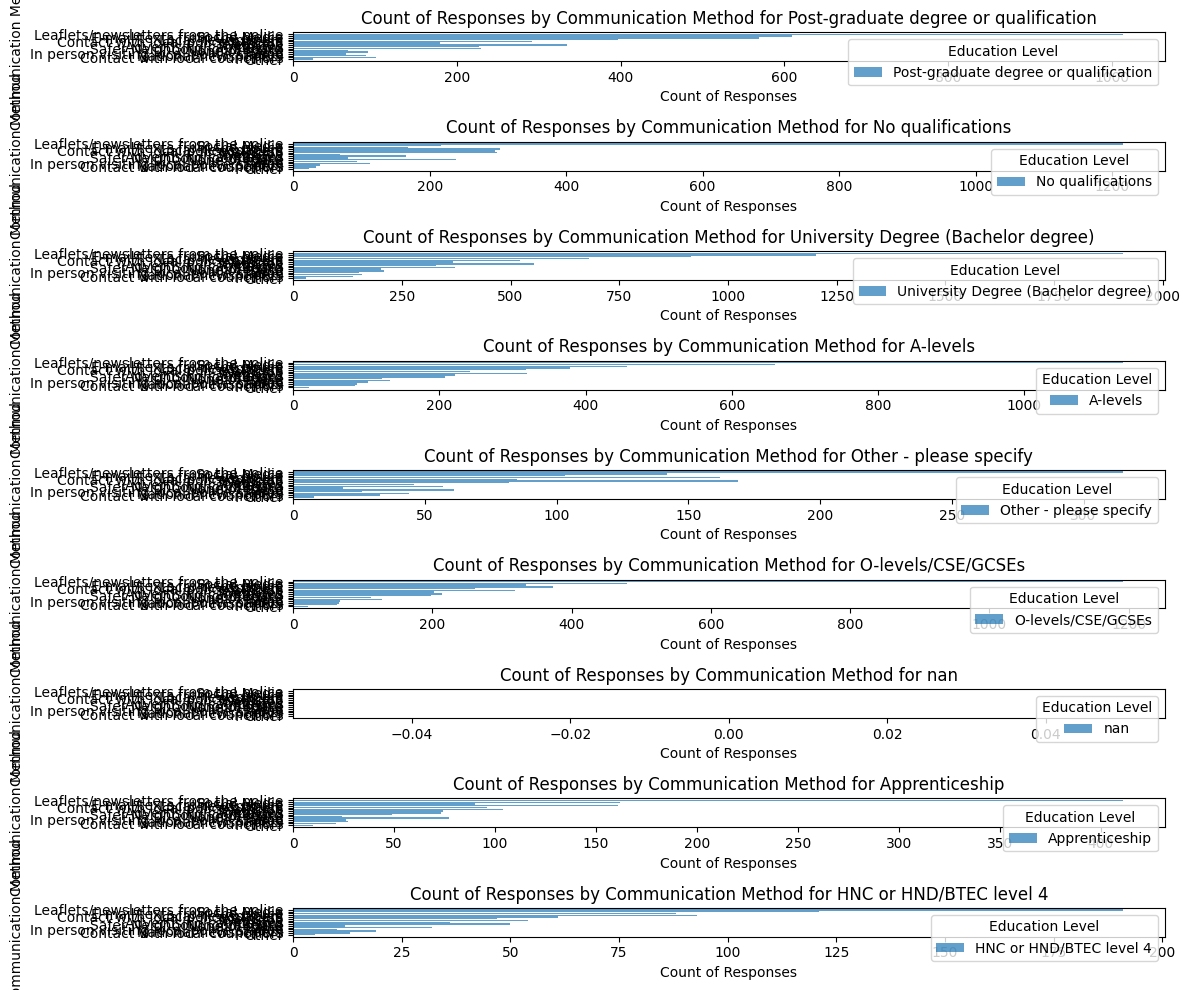

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the replacement dictionary for education levels
replacement_dict = {
    'BTEC Level 1': 'O-levels/CSE/GCSEs',
    'BTEC level 2': 'O-levels/CSE/GCSEs',
    'BTEC level 3': 'A-levels',
    'NVQ/GNVQ': 'Apprenticeship',
    'Trade apprenticeship': 'Apprenticeship',
    'ONC, OND or City and Guilds': 'A-levels'
}

# Define dictionary for column explanations
column_explanations = {
    'SQ132S': 'Other',
    'SQ132F': 'Contact with local councillors',
    'SQ132J': 'National newspapers',
    'SQ132B': 'In person visiting local police station',
    'SQ132L': 'Radio',
    'SQ132AM': 'None of these',
    'SQ132GG': 'Safer Neighbourhood Board',
    'SQ132I': 'Advertising campaigns',
    'SQ132N': 'Websites',
    'SQ132M': 'Television',
    'SQ132G': 'Contact with local police officers',
    'SQ132K': 'Local newspapers',
    'SQ132O': 'E-mail/texts from the police',
    'SQ132NN': 'Social Media',
    'SQ132P': 'Leaflets/newsletters from the police'
}

# Load the dataset
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

# Replace education levels using the replacement dictionary
df['NQ146'] = df['NQ146'].replace(replacement_dict)

# Education levels
education_levels = df['NQ146'].unique()

# Columns with counts
columns_with_counts = [
    'SQ132S', 'SQ132F', 'SQ132J', 'SQ132B', 'SQ132L', 'SQ132AM', 'SQ132GG', 'SQ132I', 
    'SQ132N', 'SQ132M', 'SQ132G', 'SQ132K', 'SQ132O', 'SQ132NN', 'SQ132P'
]

# Dictionary to store counts per education category
counts_per_education = {level: {} for level in education_levels}

# Calculate counts for each column and each education level
for column in columns_with_counts:
    for level in education_levels:
        counts = df[df['NQ146'] == level][column].apply(lambda x: x if x != '-' and pd.notna(x) else None).dropna().count()
        counts_per_education[level][column_explanations[column]] = counts

# Print counts per education category
for level, counts_dict in counts_per_education.items():
    print(f"\nEducation Level: {level}")
    for explanation, count in counts_dict.items():
        print(f"{explanation}: {count}")

# Plotting
plt.figure(figsize=(12, 10))

# Iterate through each education level
for i, level in enumerate(education_levels):
    # Create lists to store counts and methods for the current education level
    counts_list = []
    methods_list = []

    # Populate counts and methods lists
    for column in columns_with_counts:
        counts_list.append(counts_per_education[level][column_explanations[column]])
        methods_list.append(column_explanations[column])

    # Plot bars for the current education level
    plt.subplot(len(education_levels), 1, i+1)
    plt.barh(methods_list, counts_list, alpha=0.7, label=level)
    plt.xlabel('Count of Responses')
    plt.ylabel('Communication Method')
    plt.title(f'Count of Responses by Communication Method for {level}')
    plt.legend(title='Education Level', loc='upper right')

plt.tight_layout()
plt.show()


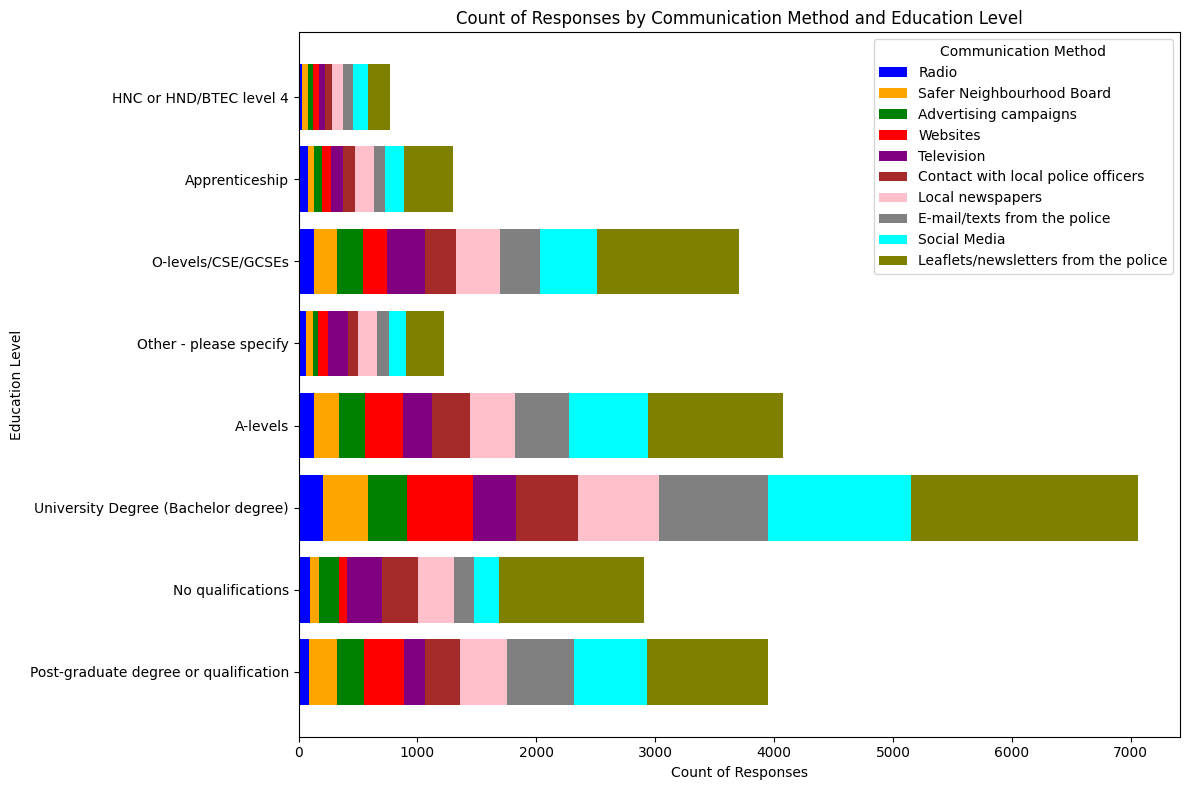

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Education levels data organized into dictionaries
education_levels = [
    'Post-graduate degree or qualification',
    'No qualifications',
    'University Degree (Bachelor degree)',
    'A-levels',
    'Other - please specify',
    'O-levels/CSE/GCSEs',
    'Apprenticeship',
    'HNC or HND/BTEC level 4'
]

# Data for each communication method category and their counts by education level
# The counts are taken from the output of the previous cell 
categories_data = {
    'Radio': [92, 93, 209, 132, 61, 128, 77, 32],
    'Safer Neighbourhood Board': [230, 81, 373, 208, 57, 198, 49, 50],
    'Advertising campaigns': [227, 165, 328, 222, 46, 214, 73, 36],
    'Websites': [334, 68, 554, 320, 82, 203, 74, 54],
    'Television': [180, 298, 367, 242, 169, 318, 104, 47],
    'Contact with local police officers': [292, 296, 521, 318, 85, 261, 96, 61],
    'Local newspapers': [397, 303, 681, 378, 162, 373, 161, 93],
    'E-mail/texts from the police': [569, 168, 916, 457, 103, 334, 90, 88],
    'Social Media': [610, 216, 1203, 659, 142, 480, 162, 121],
    'Leaflets/newsletters from the police': [1014, 1216, 1909, 1135, 315, 1192, 411, 191]
}

# Define colors for each category
colors = [
    'blue', 'orange', 'green', 'red', 
    'purple', 'brown', 'pink', 'gray', 
    'cyan', 'olive'
]

# Initialize the bottom positions for each education level
bottoms = [0] * len(education_levels)

# Plotting
plt.figure(figsize=(12, 8))

for i, (category, data) in enumerate(categories_data.items()):
    color = colors[i % len(colors)]  # Cycle through colors
    plt.barh(education_levels, data, left=bottoms, color=color, label=category)
    bottoms = [bottom + new for bottom, new in zip(bottoms, data)]  # Update bottoms for next category

plt.xlabel('Count of Responses')
plt.ylabel('Education Level')
plt.title('Count of Responses by Communication Method and Education Level')
plt.legend(title='Communication Method', loc='upper right')
plt.tight_layout()
plt.show()

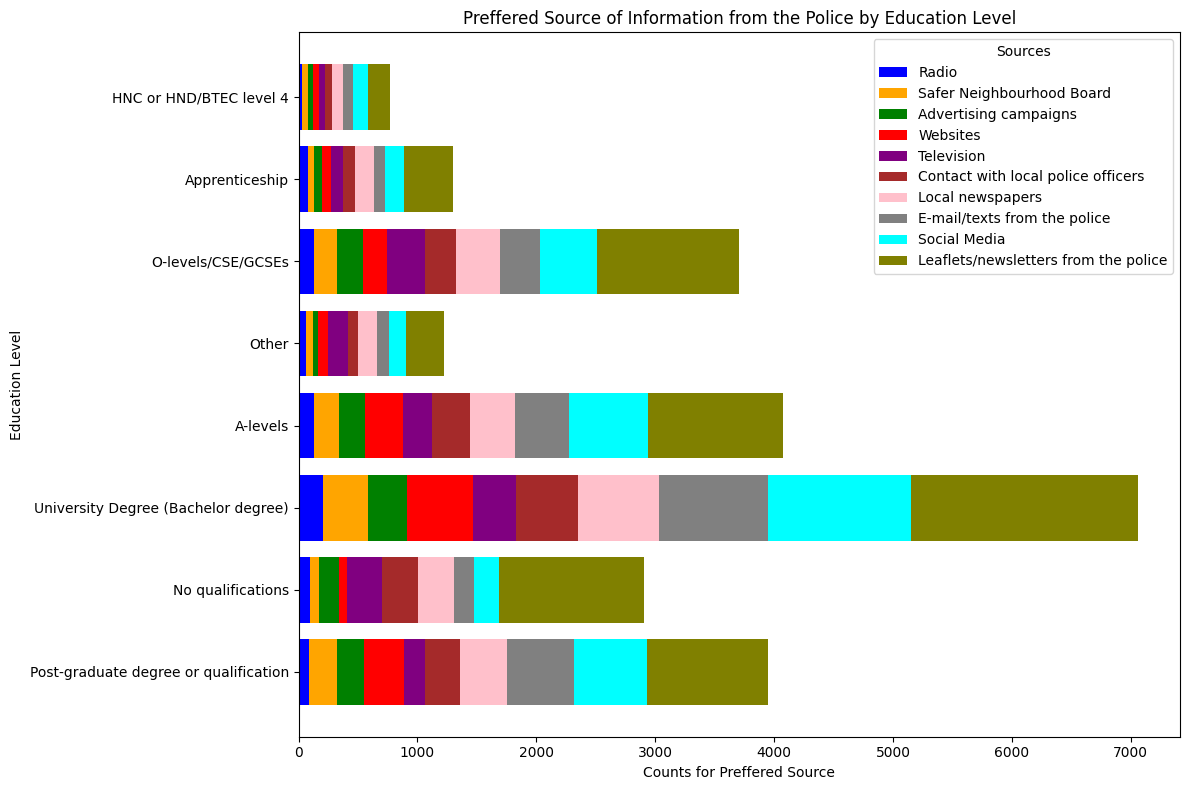

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Education levels data organized into dictionaries
education_levels = [
    'Post-graduate degree or qualification',
    'No qualifications',
    'University Degree (Bachelor degree)',
    'A-levels',
    'Other',
    'O-levels/CSE/GCSEs',
    'Apprenticeship',
    'HNC or HND/BTEC level 4'
]

# Data for each communication method category and their counts by education level
categories_data = {
    'Radio': [92, 93, 209, 132, 61, 128, 77, 32],
    'Safer Neighbourhood Board': [230, 81, 373, 208, 57, 198, 49, 50],
    'Advertising campaigns': [227, 165, 328, 222, 46, 214, 73, 36],
    'Websites': [334, 68, 554, 320, 82, 203, 74, 54],
    'Television': [180, 298, 367, 242, 169, 318, 104, 47],
    'Contact with local police officers': [292, 296, 521, 318, 85, 261, 96, 61],
    'Local newspapers': [397, 303, 681, 378, 162, 373, 161, 93],
    'E-mail/texts from the police': [569, 168, 916, 457, 103, 334, 90, 88],
    'Social Media': [610, 216, 1203, 659, 142, 480, 162, 121],
    'Leaflets/newsletters from the police': [1014, 1216, 1909, 1135, 315, 1192, 411, 191]
}

# Define colors for each category
colors = [
    'blue', 'orange', 'green', 'red', 
    'purple', 'brown', 'pink', 'gray', 
    'cyan', 'olive'
]

# Initialize the bottom positions for each education level
bottoms = [0] * len(education_levels)

# Plotting
plt.figure(figsize=(12, 8))

for i, (category, data) in enumerate(categories_data.items()):
    color = colors[i % len(colors)]  # Cycle through colors
    plt.barh(education_levels, data, left=bottoms, color=color, label=category)
    bottoms = [bottom + new for bottom, new in zip(bottoms, data)]  # Update bottoms for next category

plt.xlabel('Counts for Preffered Source')
plt.ylabel('Education Level')
plt.title('Preffered Source of Information from the Police by Education Level')
plt.legend(title='Sources', loc='upper right')
plt.tight_layout()
plt.show()

In [4]:
# Create a DataFrame

df = pd.read_csv('final_cleaned_dataset.csv')

columns_for_pca = ['Q62A', 'Q62B', 'Q62TI', 'NQ135BD', 'NQ135BH']

# Define the mapping
label_mapping = {
    'Strongly agree': 5,
    'Tend to agree': 4,
    'Neither agree nor disagree': 3,
    'Tend to disagree': 2,
    'Strongly disagree': 1,
    'Don\'t know': 0,
    'Refused': 0,
    'Not Asked': 0
}

# Map the labels to numbers for the specified columns
df_mapped = df[columns_for_pca].replace(label_mapping)

# Fill any remaining NaN values with 0
df_mapped = df_mapped.fillna(0)

# Perform PCA
pca = PCA(n_components=1)
composite_variable = pca.fit_transform(df_mapped)

# Add the composite variable to the DataFrame
df['Composite_Variable'] = composite_variable

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

Explained Variance Ratio: [0.51703364]


C:\Users\pipil\AppData\Local\Temp\ipykernel_13564\2079570399.py:3: DtypeWarning: Columns (11,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_cleaned_dataset.csv')


In [16]:
df = pd.read_csv('PAS_ward_level_FY_19_20.csv')

df.NQ146.unique()
replacement_dict = {'BTEC Level 1': 'O-levels/CSE/GCSEs','BTEC level 2':'O-levels/CSE/GCSEs','BTEC level 3':'A-levels',
                    'NVQ/GNVQ':'apprenticeship', 'Trade apprenticeship':'apprenticeship', 'ONC, OND or City and Guilds':'A-levels'
                    }
df = df.replace({'NQ146':replacement_dict})

# Filter to only important columns
filtered_data = df[['NQ147r', 'NQ155r', 'NQ146', 'Q136r', 'XQ135r', 'Q62A', 'Q62B', 'Q62TI', 'NQ135BD', 'NQ135BH']]

# Count rows with missing values
na_rows_count = filtered_data.apply(lambda row: row.isna().any(), axis=1).sum()
print(na_rows_count)

# Remove rows with missing values
cleaned_data = filtered_data.dropna()

# Remove rows with 'Other' education
cleaned_data = cleaned_data[cleaned_data['NQ146'] != 'Other - please specify']

# Rename columns for legibility
renamed_data = cleaned_data.rename(columns={
    'Q136r': 'age',
    'XQ135r': 'male',
    'NQ146': 'education',
    'NQ147r': 'ethnicity',
    'NQ155r': 'nationality'
})

age_map = {"16-24": 0, "25-34": 1, "35-44": 2, "45-54": 3, "55-64": 4, "65 or over": 5}
male_map = {"Male": 0, "Female": 1, "Other": 1}
nationality_map = {"UK": 0, "Non-UK": 1}
dependent_map = {"Strongly agree": 4, "Tend to agree": 3, "Neither agree nor disagree": 2, "Tend to disagree": 1, "Strongly disagree": 0}

renamed_data['age'] = renamed_data['age'].map(age_map)
renamed_data['male'] = renamed_data['male'].map(male_map)
renamed_data['nationality'] = renamed_data['nationality'].map(nationality_map)

renamed_data['Q62A_numeric'] = renamed_data['Q62A'].map(dependent_map)
renamed_data['Q62B_numeric'] = renamed_data['Q62B'].map(dependent_map)
renamed_data['Q62TI_numeric'] = renamed_data['Q62TI'].map(dependent_map)
renamed_data['NQ135BD_numeric'] = renamed_data['NQ135BD'].map(dependent_map)
renamed_data['NQ135BH_numeric'] = renamed_data['NQ135BH'].map(dependent_map)



filtered_df = renamed_data[renamed_data['education'].isin(['Post-graduate degree or qualification', 'No qualifications',
                                       'University Degree (Bachelor degree)', 'A-levels',
                                       'O-levels/CSE/GCSEs', 'apprenticeship', 'HNC or HND/BTEC level 4'])]

# Perform one-hot encoding
one_hot_encoded_education = pd.get_dummies(filtered_df, columns=['education'], dummy_na=True)

# Perform one-hot encoding for 'ethnicity'
#filtered_df = renamed_data.dropna(subset=['ethnicity'])
one_hot_encoded_ethnicity = pd.get_dummies(filtered_df, columns=['ethnicity'])

final_data = pd.concat([renamed_data, one_hot_encoded_education, one_hot_encoded_ethnicity], axis=1)
print(final_data.head())
final_data.to_csv('THE_FINAL_BOSS_OF_THE_DATASETS.csv', index=False)

C:\Users\pipil\AppData\Local\Temp\ipykernel_13472\1404420206.py:1: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PAS_ward_level_FY_19_20.csv')


1860
       ethnicity  nationality                              education  age   
0          Asian            1  Post-graduate degree or qualification    1  \
1    White Other            1  Post-graduate degree or qualification    4   
3          Other            1    University Degree (Bachelor degree)    1   
6  White British            0                     O-levels/CSE/GCSEs    1   
7    White Other            1    University Degree (Bachelor degree)    4   

   male           Q62A                        Q62B           Q62TI   
0     0  Tend to agree               Tend to agree   Tend to agree  \
1     1  Tend to agree              Strongly agree  Strongly agree   
3     1  Tend to agree  Neither agree nor disagree   Tend to agree   
6     0  Tend to agree               Tend to agree   Tend to agree   
7     1  Tend to agree               Tend to agree   Tend to agree   

          NQ135BD           NQ135BH  ...  Q62B_numeric  Q62TI_numeric   
0   Tend to agree  Tend to disagree  .

In [17]:
df = pd.read_csv('THE_FINAL_BOSS_OF_THE_DATASETS.csv')

df.columns = df.columns.str.replace(' ', '_')

df.to_csv('THE_FINAL_BOSS_OF_THE_DATASETS1.csv', index=False)

In [19]:
df = pd.read_csv('THE_FINAL_BOSS_OF_THE_DATASETS1.csv')
age_columns = [col for col in df.columns if 'age' in col.lower()]

# Print the list of age columns
print("Age Columns:", age_columns)

# Print the head of the columns
for col in age_columns:
    print("\nHead of column '{}':".format(col))
    print(df[col].head())
print(age_columns)

Age Columns: ['age', 'age.1', 'age.2']

Head of column 'age':
0    1
1    4
2    1
3    1
4    4
Name: age, dtype: int64

Head of column 'age.1':
0    1
1    4
2    1
3    1
4    4
Name: age.1, dtype: int64

Head of column 'age.2':
0    1
1    4
2    1
3    1
4    4
Name: age.2, dtype: int64
['age', 'age.1', 'age.2']


In [ ]:
df = pd.read_csv('final_cleaned_dataset.csv')

columns_for_pca = ['Q62A', 'Q62B', 'Q62TI', 'NQ135BD', 'NQ135BH']

# Define the mapping
label_mapping = {
    'Strongly agree': 5,
    'Tend to agree': 4,
    'Neither agree nor disagree': 3,
    'Tend to disagree': 2,
    'Strongly disagree': 1,
    'Don\'t know': 0,
    'Refused': 0,
    'Not Asked': 0
}

# Map the labels to numbers for the specified columns
df_mapped = df[columns_for_pca].replace(label_mapping)

# Fill any remaining NaN values with 0
df_mapped = df_mapped.fillna(0)

# Perform PCA
pca = PCA(n_components=1)
composite_variable = pca.fit_transform(df_mapped)

# Add the composite variable to the DataFrame
df['Composite_Variable'] = composite_variable

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

Explanation: A ratio of 0.517 means that the first principal component effectively captures more than half of the variance in the data. This is a good indicator that this component is a meaningful summary of the original data.

In [5]:
variables_to_keep = ['Composite_Variable', 'NQ147r', 'NQ146', 'Q150r', 'Q136r']
df_simplified = df[variables_to_keep]

# Save the simplified dataset to a new CSV file
simplified_file_path = 'simplified_dataset.csv'
df_simplified.to_csv(simplified_file_path, index=False)

In [6]:
df_simplified= pd.read_csv('simplified_dataset.csv')
df_encoded = pd.get_dummies(df_simplified, columns=['NQ147r', 'NQ146', 'Q150r', 'Q136r'])

# Save the simplified and encoded dataset to a new CSV file
simplified_encoded_file_path = 'simplified_encoded_dataset.csv'
df_encoded.to_csv(simplified_encoded_file_path, index=False)

In [11]:
simplified_encoded_file_path = 'simplified_encoded_dataset.csv'
df_encoded = pd.read_csv(simplified_encoded_file_path)

# Drop rows with any NaN values that might have resulted from coercion
df_encoded = df_encoded.dropna() 

df_encoded = df_encoded.astype(int)

# Define the dependent and independent variables
X = df_encoded.drop('Composite_Variable', axis=1)  # Independent variables
y = df_encoded['Composite_Variable']  # Dependent variable

print("Data types of independent variables:")
print(X.dtypes)

print("Data type of dependent variable:")
print(y.dtype)

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

Data types of independent variables:
NQ147r_Asian                                   int32
NQ147r_Black                                   int32
NQ147r_Mixed                                   int32
NQ147r_Other                                   int32
NQ147r_White British                           int32
NQ147r_White Other                             int32
NQ146_A-levels                                 int32
NQ146_BTEC Level 1                             int32
NQ146_BTEC level 2                             int32
NQ146_BTEC level 3                             int32
NQ146_HNC or HND/BTEC level 4                  int32
NQ146_NVQ/GNVQ                                 int32
NQ146_No qualifications                        int32
NQ146_O-levels/CSE/GCSEs                       int32
NQ146_ONC, OND or City and Guilds              int32
NQ146_Other - please specify                   int32
NQ146_Post-graduate degree or qualification    int32
NQ146_Trade apprenticeship                     int32
NQ146_Uni

R-squared: The R-squared value of 0.033 indicates that the independent variables collectively explain only about 3.3% of the variance in the dependent variable (Composite_Variable). This suggests that the model may not be capturing a significant portion of the variability in the data.

Adjusted R-squared: The adjusted R-squared value of 0.031 is similar to the R-squared value, indicating that the addition of independent variables did not significantly improve the model's explanatory power.

Coefficients: The coefficients represent the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. For example:

The coefficient for Q150r_Heterosexual is approximately -0.801. This suggests that, holding other variables constant, being heterosexual (compared to non-heterosexual) is associated with a decrease of approximately 0.801 units in the Composite_Variable.
Similarly, the coefficient for Q150r_Non-Heterosexual is approximately -0.534, indicating a decrease of approximately 0.534 units in the Composite_Variable for non-heterosexual individuals compared to heterosexual individuals.
Significance: The significance of each coefficient is indicated by the p-value. For a conventional significance level of 0.05, coefficients with p-values less than 0.05 are typically considered statistically significant. In your results, some coefficients have p-values below 0.05, indicating statistical significance, while others do not.

Individual Variables: Some independent variables may not be statistically significant predictors of the dependent variable, as evidenced by their high p-values. For example, NQ147r_Black, NQ147r_White British, and several others have p-values greater than 0.05, suggesting that they may not be significant predictors in this model.

F-statistic: The F-statistic tests the overall significance of the model. The associated p-value (Prob (F-statistic)) is very small, indicating that the model as a whole is statistically significant.

Model Interpretation: Based on these results, it's essential to carefully interpret the coefficients and their significance. You may consider refining the model by including additional variables, exploring interactions between variables, or transforming variables if necessary to improve model performance.